In [1]:
# Load and clean data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object 
data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')


In [6]:
# Data visualization
import seaborn as sns

# Shows the distribution of labels and tag_identificators
'''fig, axs = plt.subplots(2, figsize=(6, 10))

sns.countplot(ax = axs[0], y="activity", data=data_act, hue='tag_identificator') # Hue is a cool feature
sns.countplot(ax = axs[1], y="tag_identificator", data=data_act)
plt.show()'''

# Alternative way of showing distribution using built in dataframe methods
#data_act['activity'].value_counts().plot(kind='barh')

# Scatterplot that does not work yet
'''fig, ax = plt.subplots()
plt.scatter(data_act['x-coordinate'],data_act['y-coordinate'],c=data_act['activity'])
plt.grid()
plt.show()


sns.scatterplot(x=df['dist_from_home'],y=df['purchase_price_ratio'], hue=df['fraud'])
'''

"fig, ax = plt.subplots()\nplt.scatter(data_act['x-coordinate'],data_act['y-coordinate'],c=data_act['activity'])\nplt.grid()\nplt.show()"

In [47]:
# Split data into 4 different models based on tag
data_act_belt = data_act[data_act['tag_identificator'].isin(['belt'])]
data_act_chest = data_act[data_act['tag_identificator'].isin(['chest'])]
data_act_anrig = data_act[data_act['tag_identificator'].isin(['ankle_right'])]
data_act_anlef = data_act[data_act['tag_identificator'].isin(['ankle_left'])]

In [48]:
# Split into training and test set

from sklearn.model_selection import train_test_split
import numpy as np

# We scramble all the different sequences (A01, E03 etc) and strafify by label.
Y_chest = data_act_chest['activity'] 
X_chest = data_act_chest
# Drop unnecessary data
column_list = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'activity']
for element in column_list:
    X_chest = X_chest.drop(element, axis=1)

X_chest_train, X_chest_test, y_chest_train, y_chest_test = train_test_split(X_chest, Y_chest, train_size=0.8, random_state=42, stratify=Y_chest)



# The code below can be used to test that stratification works as intended. 
# The proportions of the different labels should be the same
'''
X_chest_train['activity'] = y_chest_train # Add labels back
X_chest_train['train'] = np.ones(len(X_chest_train)) # Add a new indicator that it comes from training set
X_chest_test['activity'] = y_chest_test
X_chest_test['train'] = np.zeros(len(X_chest_test))
X_chest_total = pd.concat([X_chest_train, X_chest_test])

sns.countplot(y='activity', data=X_chest_total, hue='train')'''


"\nX_chest_train['activity'] = y_chest_train # Add labels back\nX_chest_train['train'] = np.ones(len(X_chest_train)) # Add a new indicator that it comes from training set\nX_chest_test['activity'] = y_chest_test\nX_chest_test['train'] = np.zeros(len(X_chest_test))\nX_chest_total = pd.concat([X_chest_train, X_chest_test])\n\nsns.countplot(y='activity', data=X_chest_total, hue='train')"

In [49]:
# Select correct features


# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
'''scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

scaler = StandardScaler()
X_chest_train = scaler.fit_transform(X_chest_train)
X_chest_test = scaler.transform(X_chest_test)'''

'scaler = StandardScaler()\nX_chest_train = scaler.fit_transform(X_chest_train)\nX_chest_test = scaler.transform(X_chest_test)'

In [50]:
# Fit model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_chest_train, y_chest_train)


KNeighborsClassifier(n_neighbors=1)

/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

Test set predictions: ['sitting on the ground' 'sitting' 'lying' ... 'walking' 'lying'
 'standing up from lying']
Test set labels: 121492              sitting down
67602                    sitting
35241                      lying
121321                   walking
92107                    walking
                   ...          
150023                     lying
73728                    walking
2917                     walking
66900                      lying
48622     standing up from lying
Name: activity, Length: 7161, dtype: object
[[  29   15    2    0   14    1   15   22    0    2   23]
 [  17 2067   57   63    3    1    3  170    1    1    3]
 [   0   52   56   15   19    1    0   88    3    4   25]
 [   1   48   23  113    4    1    5   27    2    5    1]
 [  12    4    8    2 1049   14    6   20    6    5   56]
 [   2    1    1    2   28   11    2   10    0    1   14]
 [   9    2    0    2    9    0  469   25    0   28    2]
 [  13  153   94   33   28   10   12  362    2   26   61

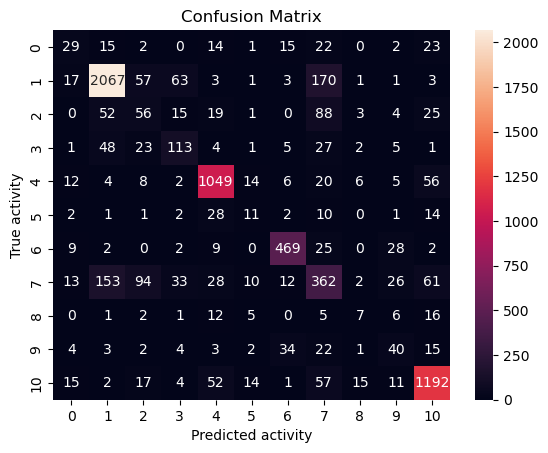

In [54]:
# Evluation
predictions = knn.predict(X_chest_test)
print("Test set predictions:", predictions)
print("Test set labels:", y_chest_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_chest_test, predictions)
print(confusion)
from sklearn.metrics import classification_report
print(classification_report(y_chest_test, knn.predict(X_chest_test)))


sns.heatmap(confusion, annot=True, fmt='d', xticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted activity')
plt.ylabel('True activity')
plt.show()